In [ ]:
%load_ext tensorboard
!rm -rf ./logs/ 

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

import numpy as np
from timeit import default_timer as timer
from time import time

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

print("TF-Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# print("Cuda Capability:", tf.test.is_gpu_available( cuda_only=True, min_cuda_compute_capability=None))

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

for d in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(d, True)
    print(d)

TF-Version:  2.1.0
Eager mode:  True
Num GPUs Available:  2
Default GPU Device: /device:GPU:0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


## Load Dataset
This workboor uses [coil100](https://www.tensorflow.org/datasets/catalog/coil100) dataset
> Whole list of avalable datsets you can see [here](https://www.tensorflow.org/datasets/catalog/overview)  

In [5]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import datetime
# import pdb; pdb.set_trace()

raw_ds, info = tfds.load('coil100', split='train[:6000]', shuffle_files=True, with_info=True)
print(info)


Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousRandomSeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelInterleaveDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
tfds.core.DatasetInfo(
    name='coil100',
    version=1.0.0,
    description='The dataset contains 7200 color images of 100 objects
(72 images per object). The objects have a wide variety of complex geometric and reflectance characteristics.
The objects were placed on a motorized turntable against a black background.
The turntable was rotated through 360 degrees to vary object pose

### Dispaly 25 images 

<https://www.tensorflow.org/tutorials/keras/classification>

## Build AlexNet
 

In [8]:
from AlexNet_V2 import get_AlexNet

Image_width = 224
Image_height = 224
NUM_CLASSES = 100

model = get_AlexNet(Image_width, Image_height, NUM_CLASSES)
result = model.compile( loss=tf.keras.losses.CategoricalCrossentropy(), #categorical_crossentropy
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['accuracy'])

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

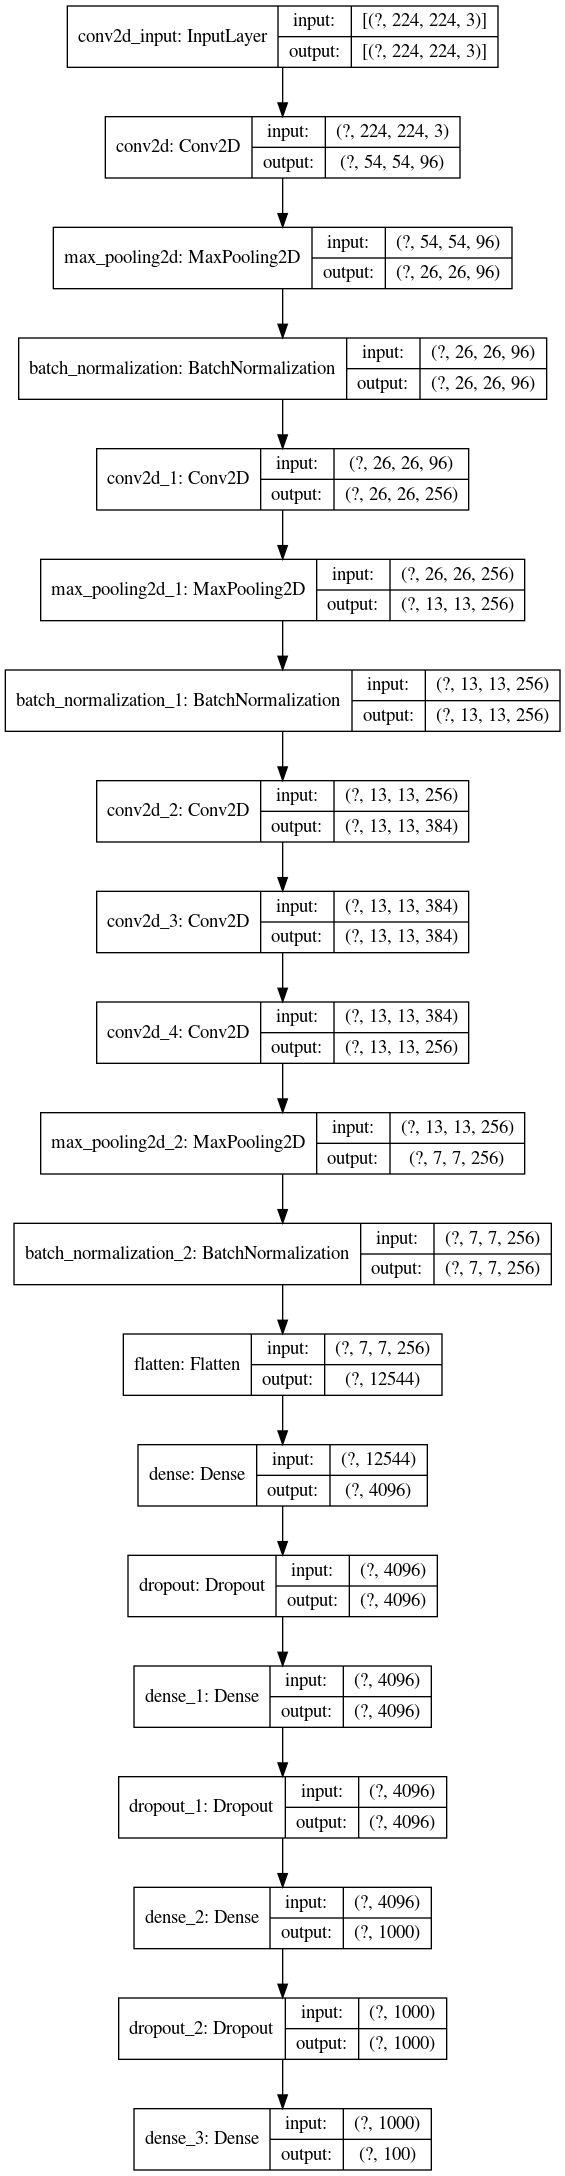

In [10]:
# dispaly model graph 
tf.keras.utils.plot_model(
    model, to_file='alexnet.model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96)

In [ ]:
!kill 27454

In [ ]:
%tensorboard --logdir logs/fit

In [11]:
def divide(record):
    image = record["image"]
    image = tf.image.resize(image, (Image_width,Image_height))
    # image = tf.image.resize_with_pad(image, 224,224)
    image=tf.cast(image, tf.int32)
    print(image.shape)
    label = record["label"]
    return image,label

test_batch_size = 1200
train_batch_size = 6000

train_ds = raw_ds.map(divide , num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(train_batch_size).prefetch(train_batch_size)
print(type(train_ds))  

(224, 224, 3)
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0


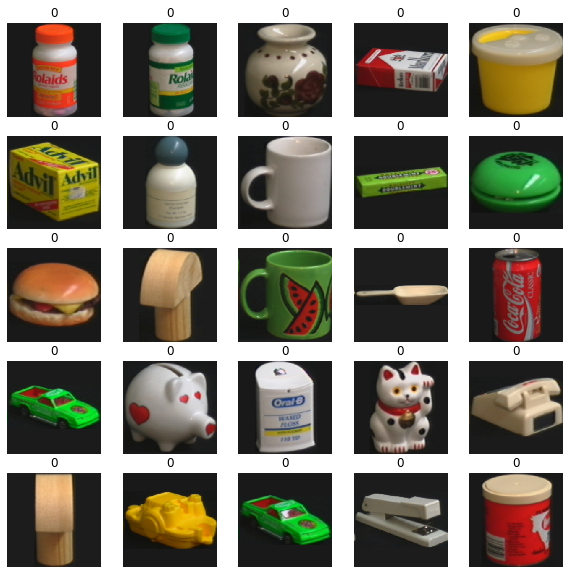

In [12]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')
        
for image_batch, label_batch in train_ds.take(1):
     show_batch(image_batch, label_batch)

In [14]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/GPU:0'):
    for image_batch, label_batch in train_ds:
        one_hot_y = tf.one_hot(label_batch, NUM_CLASSES)
        history = model.fit(image_batch, one_hot_y, epochs=10, callbacks=[tensorboard_callback],verbose=0,validation_split=0.2)

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset 

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-14-80a018ef1f50>:7) ]] [Op:__inference_distributed_function_2919]

Function call stack:
distributed_function


In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Evaluate 

In [ ]:
%tensorboard --logdir logs/evaluate

In [ ]:
# evaluate 
raw_ds, info = tfds.load('coil100', split='train[6000:7200]', shuffle_files=True, with_info=True)

test_ds = raw_ds.map(divide , num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(train_batch_size).prefetch(train_batch_size)
print(type(test_ds))  

log_dir = "logs/evaluate/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/GPU:0'):
    for image_batch, label_batch in test_ds:
        one_hot_y = tf.one_hot(label_batch, NUM_CLASSES)
        test_loss, test_acc =  model.evaluate(image_batch, one_hot_y,  verbose=2, callbacks=[tensorboard_callback])
        